# Time-dependent Quantum Mechanics and Spectroscopy

## 2023 assignment

This assignment is formed of two parts. In part 1 the goal is to generate a spectrum from first principles given detailed information about the system. In part 2 the goal is to infer information about a system given time-resolved experimental data.

You need to write a report including both parts of the assignment to be submitted via Turnitin. There is a word count limit on the report of 2000 words (with a 10% tolerance), excluding captions, titles and references. Each part of the assignment is worth 50%. The deadline for submission is May 10th at 18:00.

The main goal of the assignment *is not* to simply complete the task, but to be able to demonstrate your understanding of how the different concepts are related and how the result is obtained.

## Part 1

(Atomic units are used throughout this section.)

The main goal of this part of the assignment is to study the Schumann-Runge band of the <sup>16</sup>O<sub>2</sub> spectrum, due to transitions from the X<sup>3</sup>&Sigma;<sub>g</sub><sup>-</sup> ground electronic state to the B<sup>3</sup>&Sigma;<sub>u</sub><sup>-</sup> excited state. This band is responsible for a good part of the UV radiation absorption in the Earth's atmosphere, and in this way it shaped the evolution of life on this planet.

We will consider the following potential energy curves of the two states involved shown below.



The potential energy curves for each state are represented by the Varshni potential:
$$V(x)=D_e \left(1-\frac{r_e}{x}e^{-\beta(x^2-r_e^2)}\right)^2+T_e.$$


The potential parameters used for each state are:

||X <sup>3</sup>&Sigma;<sub>g</sub><sup>-</sup>|B <sup>3</sup>&Sigma;<sub>u</sub><sup>-</sup>|
|----------------------------------|---------|---------|
|D<sub>e</sub>/E<sub>h</sub>       |0.19158  |0.03342  |
|r<sub>e</sub>/a<sub>0</sub>       |2.29716  |3.03150  |
|&beta;/a<sub>0</sub><sup>-2</sup> |0.21098  |0.19459  |
|T<sub>e</sub>/E<sub>h</sub>       |0.10     |0.327    |

We will consider that the wavefunction of the system in the ground state is the lowest eigenstate of the harmonic oscillator with a force constant consistent with the ground state potential $k=\left.\frac{d^2 V}{d x^2}\right|_{x=r_e}$, which in this case is $k=2 D_e^X\left(\frac{1}{r_e^X}+2 \beta^X r_e^X \right)^2$.

We will also consider that the transition dipole moment &mu;<sub>XB</sub> between the two electronic states dependence on the inter-atomic distance is given by the following python function:

    import numpy as np

    def transition_dipole_moment(x):
        '''Transition dipole moment dependence on the inter-atomic
        coordinate x for the O2 electronic transition.
        The input x, and the output of the function are in atomic units.'''

        #parameters for connecting function
        ss=2
        es=2.28
        plateau=0.266
        peak=0.94

        #step function of order 7 (n=3)
        xs=(x-ss)/(es-ss)
        step= -20*xs**7 + 70*xs**6 - 84*xs**5 + 35*xs**4
        step= plateau + (peak-plateau)*step

        #exponential decay for higher x values
        decay=3.85*np.exp(-0.626*x)

        return np.where(x<ss,plateau,np.where(x>es,decay,step))

The accompanying file [qdyn.py](qdyn.py) includes the Python functions `propagator()` and `animate_dynamics()`. The former implements the time-evolution operator for a system given an arbitrary potential, 

$$\varphi(x,t_0+\Delta t)=e^{-i \hat{H} \Delta t}\varphi(x,t_0),$$

while the latter can be used to display the evolution of the wavefunction of the system with time. Refer to the functions' documentation for details on their use.

### Discussion points to include in the report

#### Describe how your spectrum was obtained

#### Analyse the vibronic spectrum and relate it to the dynamics of the system

In describing the dynamics you can include a qualitative description of how the wavefunction changes with time and how this relate to the spectrum. In the case we are studying, it is interesting to consider the main dynamics features, but also the details of the dynamics inside the excited state potential well.

You can also try to be more quantitative, using results that you have obtained (i.e. autocorrelation function) or explicitly calculated in your analysis. You could look for example at how the expectation value of the position changes with times; or how the spread in positions changes in time.

#### Eigenstates of the excited state curve

For reasons that may become apparent as you perform your simulations, it is quite challenging to calculate a well resolved absorption spectrum of the O<sub>2</sub> Schumann-Runge band. If you do manage to obtain a well resolved spectrum, identify the most intense vibronic peak corresponding to a transition to a bound state on the excited state potential, and the energy of the final state.

With that information, and from the dynamics you simulate, it is possible to obtain the vibrational eigenfunction of that state: if the time-dependent Schrödinger equation is solved, one can find the solutions of the time-independent Schrödinger equation. (D. J. Tannor, *Introduction to Quantum Mechanics: a time-dependent perspective*, University Science Books, 2007, section 6.3.) To see this we first expand the nuclear wavefunctions of the excited state curve at time t<sub>0</sub> &phi;<sup>B</sup>(x,t<sub>0</sub>), as a function of the, as of now unknown but existing, eigenstates of that curve &Lambda;<sub>v</sub><sup>B</sup>(x):

$$\varphi^B(x,t_0)=\sum_i c_i \Lambda_i^B(x).$$

If we apply the excited state time-evolution operator to both sides of this expression (remember &hbar;=1), we get:

$$e^{-i \hat{H}^B (t-t_0)} \varphi^B(x,t_0)=e^{-i \hat{H}^B (t-t_0)}\sum_i c_i \Lambda_i^B(x) \Leftrightarrow \varphi^B(x,t)=\sum_i c_i e^{-i E_i^B t}\Lambda_i^B(x).$$

By multiplying both sides of the equality by $e^{i E_v^B t}$ where $E_v^B$ is an eigenvalue of a specific eigenstate, and integrate over time:

$$\int_{-\infty}^{\infty}e^{i E_v^B t} \varphi^B(x,t) dt= \sum_i c_i \int_{-\infty}^{\infty}e^{i (E_v^B-E_i^B) t} \Lambda_i^B(x) dt = 2 \pi \sum_i c_i \delta(E_v^B-E_i^B) \Lambda_i^B(x) \propto \Lambda_v^B(x).$$

The left-hand side of the equation can be calculated from the dynamics, the right-hand side is our unknown.

Plot the vibrational eigenfunction of the excited state potential corresponding to the most intense vibronic peak corresponding to a transition to a bound state on the excited state potential, and report on its quantum number.

For this technique to work, one needs an accurate estimate of the energy the final state determined from a very well resolved absorption spectrum. If you struggle to obtain a resolved spectrum, you can use alternative techniques to obtain a sufficiently accurate energy of an eigenfunction of your choice on the excited state potential, and describe the procedure you followed to obtain it.

For the eigenfunction you have obtained, estimate the Franck-Condon factor for the transition starting from the ground vibrational state on the ground state. Compare this value to that of the v'=0 &rarr; v''=0 transition. You can consider that the ground vibrational state wavefunction for each electronic state is well approximated by an harmonic oscillator eigenfunction.

### Technical tips

* To make sure you have defined the functions for the potential correctly, start by plotting them to reproduce the figure above.
* Overlap the plot of your initial wavefunction and the transition dipole moment with your potential curves, to make sure these are defined correctly.
* In order to obtain valid results it is critical to set up an adequate grid of space points. The grid should be fine enough to describe high momentum components of the wavefunction. You should set the limits of the grid such that the wavefunction remains equal to zero at the limits of the grid throughout all the simulation to avoid artefacts. Check that this is the case before doing any further calculations.
* The time-step should be small enough to propagate the wavefunction correctly. But a too small time-step may require too many steps to be taken, and depending on how fine is your space grid this may need greater memory resources than those available in the computer you are using. Make tests with short runs, and simulate for longer times when needed.

In [409]:
%run qdyn.py

<Figure size 432x288 with 0 Axes>

In [410]:
%pylab qt

Populating the interactive namespace from numpy and matplotlib


D:\anacoda1\ancoda\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['step', 'title', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [411]:
from qdyn import propagator, animate_dynamics

In [412]:
def V_ground(x):
    de=0.19158
    re=2.29716
    beta=0.21098
    te=0.1
    return de*(1-re/x*np.exp(-beta*(x**2-re**2)))**2+te


def V_excited(x):
    de=0.03342
    re=3.03150
    beta=0.19459
    te=0.327
    return de*(1-re/x*np.exp(-beta*(x**2-re**2)))**2+te

def k_grnd():
    de=0.19158
    re=2.29716
    beta=0.21098
    te=0.1
    k_grnd = 2*de*(1/re+2*beta*re)**2
    return k_grnd


In [413]:
from numpy.polynomial.hermite import hermval

def eigen_ho(x,v,m,k):
    """Calculates the eigenfunction of the harmonic oscillator system.
    
    Arguments
    x: is a space coordinate.
    v: is the vibrational quantum number.
    m: is the mas of the system.
    k: is the force constant of the harmonic potential.
    """
    
    hermite_sum=zeros(v+1)
    hermite_sum[-1]=1
    return 1/(2**v * math.factorial(v))**0.5 * (((m*k)**0.5)/pi)**0.25 * np.e**(-x**2 * ((m*k)**0.5)/2) * hermval((m*k)**0.25 * x,hermite_sum) 

In [414]:
import numpy as np
def transition_dipole_moment(x):
    '''Transition dipole moment dependence on the inter-atomic
    coordinate x for the O2 electronic transition.
    The input x, and the output of the function are in atomic units.'''

    #parameters for connecting function
    ss=2
    es=2.28
    plateau=0.266
    peak=0.94

    #step function of order 7 (n=3)
    xs=(x-ss)/(es-ss)
    step= -20*xs**7 + 70*xs**6 - 84*xs**5 + 35*xs**4
    step= plateau + (peak-plateau)*step

    #exponential decay for higher x values
    decay=3.85*np.exp(-0.626*x)

    return np.where(x<ss,plateau,np.where(x>es,decay,step))

In [415]:
m=14583 #reduced mass of O2 in atomic units
x_grid=np.linspace(1,10,10000)

wf_grd = eigen_ho((x_grid-2.29716),0,m,k_grnd())
miu = transition_dipole_moment(x_grid)

wf_exci = wf_grd*miu

In [416]:
plt.plot(x_grid,miu)
plt.plot(x_grid,wf_grd)
plt.plot(x_grid,wf_exci)

In [427]:
plt.plot(x_grid,wf_exci,color='orange')
title('wavefunction of excited state vs x_grid')
xlabel('x_grid')
ylabel('wavefunction of excited state vs x_grid φ_1')


Text(0, 0.5, 'wavefunction of excited state vs x_grid φ_1')

In [ ]:
plt.plot(x_grid,miu)

In [378]:
k_grnd()

0.7559688503076477

In [429]:
dt=0.5
nsteps=3000

wf_dynamics_exi=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics_exi[0]=wf_exci


for step in range(nsteps):
    psi_exi=propagator(x_grid,wf_dynamics_exi[step],m,dt,V_excited)
    wf_dynamics_exi[step+1]=psi_exi
    
wf_dynamics_exi[1:] = wf_dynamics_exi[1:]*miu

animate_dynamics(x_grid,wf_dynamics_exi,dt,V_excited(x_grid))

In [431]:
autocor_int = trapz(conj(wf_dynamics_exi[0])*wf_dynamics_exi[:],x_grid)
gauss_w=ifftshift(ifft(autocor_int,norm="ortho"))
frequency=2 * pi * fftshift(fftfreq(nsteps+1,d=dt))

xlim([0,1])

plot(frequency,gauss_w,marker = '.')

D:\anacoda1\ancoda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [432]:
plot(frequency,gauss_w,marker = '.')
title('Power spectrum')
xlabel('Frequency')
ylabel('Spectrum')

D:\anacoda1\ancoda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Spectrum')

In [434]:
plot(autocor_int)

D:\anacoda1\ancoda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [436]:
autocor_int = trapz(conj(wf_dynamics_exi[0])*wf_dynamics_exi[:],x_grid)
gauss_w=ifftshift(ifft(autocor_int,norm="ortho"))
frequency=2 * pi * fftshift(fftfreq(nsteps+1,d=dt))

te = 0.1
E_grd = 1/2 * (k_grnd()/m) + te
gauss_w_subsEgrd = gauss_w - E_grd

AbsoSpec = (2*pi*frequency)/(3*137.037) * gauss_w *(2*pi)**0.5

xlim([0,0.75])
plot((frequency-E_grd),AbsoSpec)

D:\anacoda1\ancoda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [438]:
plot((frequency-E_grd),AbsoSpec)
title('Absorption spectrum')
xlabel('Frequency')
ylabel('Spectrum')

D:\anacoda1\ancoda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(14.25, 0.5, 'Spectrum')

In [441]:
from scipy.signal import find_peaks

gauss_w_subsEgrd.argmax()

peakmax = frequency-E_grd
peak_value = peakmax[1606]
peak_value

0.3438378875805323

In [439]:
gauss_w_subsEgrd.argmax()


1606

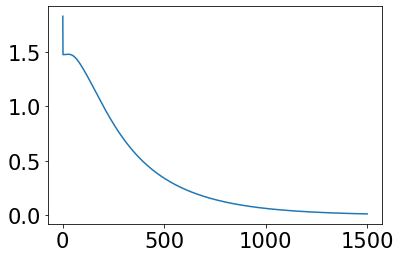

In [398]:
def exp_x(i):
    del_x_02 = trapz(conj(wf_dynamics_exi[i]) * x_grid * wf_dynamics_exi[i],x_grid)
    return del_x_02


expected_x_list = []

for i in range(len(wf_dynamics_exi)):
    expected_x_list.append(exp_x(i))

plot(expected_x_list)

In [399]:
def sprdX(t):
    del_x_01 = trapz(conj(wf_dynamics_exi[t]) * x_grid**2 * wf_dynamics_exi[t])
    del_x_02 = trapz(conj(wf_dynamics_exi[t]) * x_grid * wf_dynamics_exi[t])
    del_x = del_x_01-del_x_02**2
    return del_x

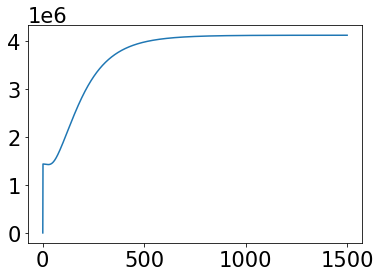

In [400]:
spread_x_list = []

for i in range(len(wf_dynamics_exi)):
    spread_x_list.append(sprdX(i)-sprdX(0))

plot(spread_x_list)

In [393]:
del_x_0

NameError: name 'del_x_0' is not defined

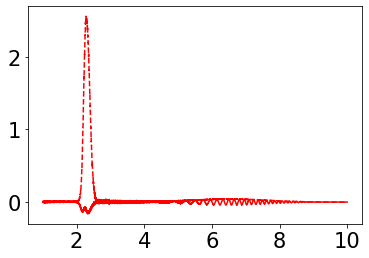

In [401]:
t_grid=linspace(0,(nsteps+1)*dt,nsteps+1)
shif4=np.e**(1j*(peak_value+E_grd+0.1)*t_grid)
integrand4=[]
newwf4=[]
for i in range(len(wf_dynamics_exi[0])):
    integrandd4=shif4*wf_dynamics_exi[:,i]
    integrand4.append(integrandd4)
for i in integrand4:
    newwf4.append(np.trapz(i,t_grid))


plt.plot(x_grid,-np.real(newwf4/np.sqrt(np.trapz(abs(np.array(newwf4))**2,x_grid))),label='$Re(\Lambda_4^A(x))$',color="red")
plt.plot(x_grid,np.abs(newwf4)/np.sqrt(np.trapz(abs(np.array(newwf4))**2,x_grid)),label='$|\Lambda_4^A(x)|$',color="red",linestyle="--")

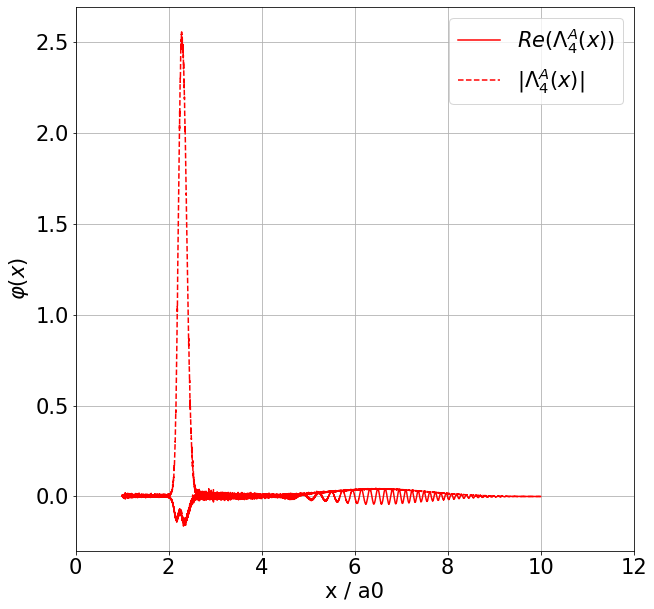

In [395]:
%matplotlib qt



t_grid=linspace(0,(nsteps+1)*dt,nsteps+1)
shif4=np.e**(1j*(peak_value+E_grd+0.1)*t_grid)
integrand4=[]
newwf4=[]
for i in range(len(wf_dynamics_exi[0])):
    integrandd4=shif4*wf_dynamics_exi[:,i]
    integrand4.append(integrandd4)
for i in integrand4:
    newwf4.append(np.trapz(i,t_grid))




%matplotlib inline
plt.rcParams.update({'font.size': 21})
plt.figure(figsize=(10,10))
#plt.plot(x_grid,-np.real(newwf3/np.sqrt(np.trapz(abs(np.array(newwf3))**2,x_grid))),label='$Re(\Lambda_3^A(x))$',color="blue")
#plt.plot(x_grid,np.abs(newwf3)/np.sqrt(np.trapz(abs(np.array(newwf3))**2,x_grid)),label='$|\Lambda_3^A(x)|$',color="blue",linestyle="--")

plt.plot(x_grid,-np.real(newwf4/np.sqrt(np.trapz(abs(np.array(newwf4))**2,x_grid))),label='$Re(\Lambda_4^A(x))$',color="red")
plt.plot(x_grid,np.abs(newwf4)/np.sqrt(np.trapz(abs(np.array(newwf4))**2,x_grid)),label='$|\Lambda_4^A(x)|$',color="red",linestyle="--")

plt.ylabel(r'$\varphi(x)$')
plt.xlabel('x / a0')
plt.legend()
plt.grid()
plt.xlim(0,12)
plt.savefig('excitedv9')


## Part 2

A range of modern lighting and display technologies relies on colour conversion layers (CCLs), which enable the efficient conversion of light from shorter to longer wavelengths.

The newly developed optical material for CCL has been studied through spectroscopic analysis. The material was a transparent and chemically stable polyvinylcarbazole (PVK) film doped with two fluorescent dyes, BV440 and Atto505. The doping concentration for each dye was kept relatively low, less than 1% by weight. Additionally, both dyes were characterized through absorption and photoluminescence spectroscopies conducted under steady-state conditions. No phosphorescence or sample degradation effects were observed during the measurements.

The spectroscopic data are provided to you as ASCII files with space-separation between numbers.  Data set includes:

* Separately measured [absorption spectrum of BV440](Abs-BV440) (first column – wavelength (nm), second - optical density (OD))
* Separately measured [absorption spectrum of Atto505](Abs-Atto505) (first column - wavelength, second - OD)
* Separately measured [fluorescence spectrum of BV440](Fluorescence-BV440) (first column - wavelength, second – photon counts in arb.u.)
* Separately measured [fluorescence spectrum of Atto505](Fluorescence-Atto505) (first column - wavelength, second – photon counts in arb.u.)
* [Transient absorption spectrum](TA_2D-DATA.mx3) of the studied material (BV440 and Atto505 dopped PVK) after excitation at 370nm (2D matrix; the first column contains pump-probe delay times (ps) and the first row contains probe wavelengths; matrix elements show the change in transmission dT/T at the corresponding time/wavelength)

Your task is to analyse the experimental dataset and present a report addressing the following questions:

1. Identify excited states involved in the photochemistry and spectroscopy of the material. Propose a Jablonski diagram showing key processes happening in the material. When possible, specify the energies of excited states
2. Discuss and interpret cross-sections through transient absorption spectrum at (at least) two representative times and two representative wavelengths
3. Analyse the dynamics of the excited states and extract the timescale(s) of the dynamics using additional information provided by SVD or global fitting. Relate the identified timescales to the relevant dynamical processes on the Jablonski diagram proposed above.
4. Where possible, identify the vibrational modes of BV440 and Atto505 (use multiple approaches if you can). Assign the observed vibrational coherences (if any) to the electronic states.

Please support your analysis with the figures and references to the relevant theoretical background.

Solution:

In [324]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [325]:
A_BV440=loadtxt('Abs-BV440')
A_atto505=loadtxt('Abs-atto505')
F_BV440=loadtxt('Fluorescence-BV440')
F_atto505=loadtxt('Fluorescence-Atto505')
TAS=loadtxt('TA_2D-DATA.mx3')

In [330]:
TAS_WL=TAS[0]
TAS_TA=TAS[1:]
TW=range(1,7502)

In [331]:
TAS_TA

array([[-2.50000000e+00, -1.11312262e-06,  5.13690796e-05, ...,
        -4.77357411e-05,  4.59269995e-06, -2.44699771e-05],
       [-2.49700000e+00, -1.52451999e-04,  3.44397961e-06, ...,
         6.26474943e-05,  1.71661555e-05, -2.98235675e-05],
       [-2.49400000e+00, -5.93155723e-05,  1.41512595e-05, ...,
         1.33076222e-05, -2.67466622e-06, -1.74044827e-05],
       ...,
       [ 1.99940000e+01,  7.47475089e-05,  7.01702663e-05, ...,
        -1.18495170e-04, -6.59810099e-05, -9.49227856e-05],
       [ 1.99970000e+01, -1.23075754e-05,  1.13012880e-04, ...,
        -7.07873627e-05,  3.64853147e-06, -1.34787104e-05],
       [ 2.00000000e+01, -5.38486918e-05,  2.96455957e-05, ...,
        -1.15960992e-04, -8.53044639e-05, -7.39779251e-05]])

In [332]:
A_BV440_WL=A_BV440[:,0]
A_BV440_OD=A_BV440[:,1]
F_BV440_WL=F_BV440[:,0]
F_BV440_OD=F_BV440[:,1]
A_atto505_WL=A_atto505[:,0]
A_atto505_OD=A_atto505[:,1]
F_atto505_WL=F_atto505[:,0]
F_atto505_OD=F_atto505[:,1]

Text(0, 0.5, 'Photon counts in arb.u.')

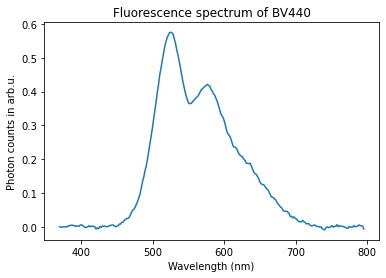

In [333]:
plot(F_BV440_WL,F_BV440_OD)
title('Fluorescence spectrum of BV440')
xlabel('Wavelength (nm)')
ylabel('Photon counts in arb.u.')

Text(0, 0.5, 'Optical density (OD)')

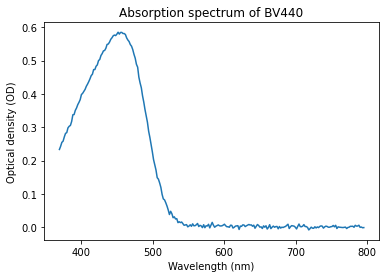

In [334]:
plot(A_BV440_WL,A_BV440_OD)
title('Absorption spectrum of BV440')
xlabel('Wavelength (nm)')
ylabel('Optical density (OD)')

Text(0, 0.5, 'Photon counts in arb.u.')

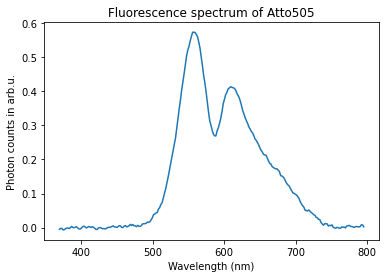

In [335]:
plot(F_atto505_WL,F_atto505_OD)
title('Fluorescence spectrum of Atto505')
xlabel('Wavelength (nm)')
ylabel('Photon counts in arb.u.')

Text(0, 0.5, 'Optical density (OD)')

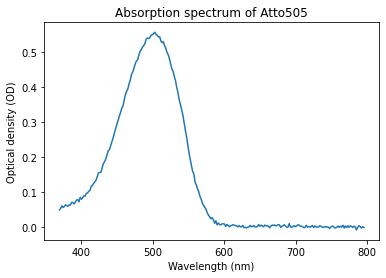

In [336]:
plot(A_atto505_WL,A_atto505_OD)
title('Absorption spectrum of Atto505')
xlabel('Wavelength (nm)')
ylabel('Optical density (OD)')

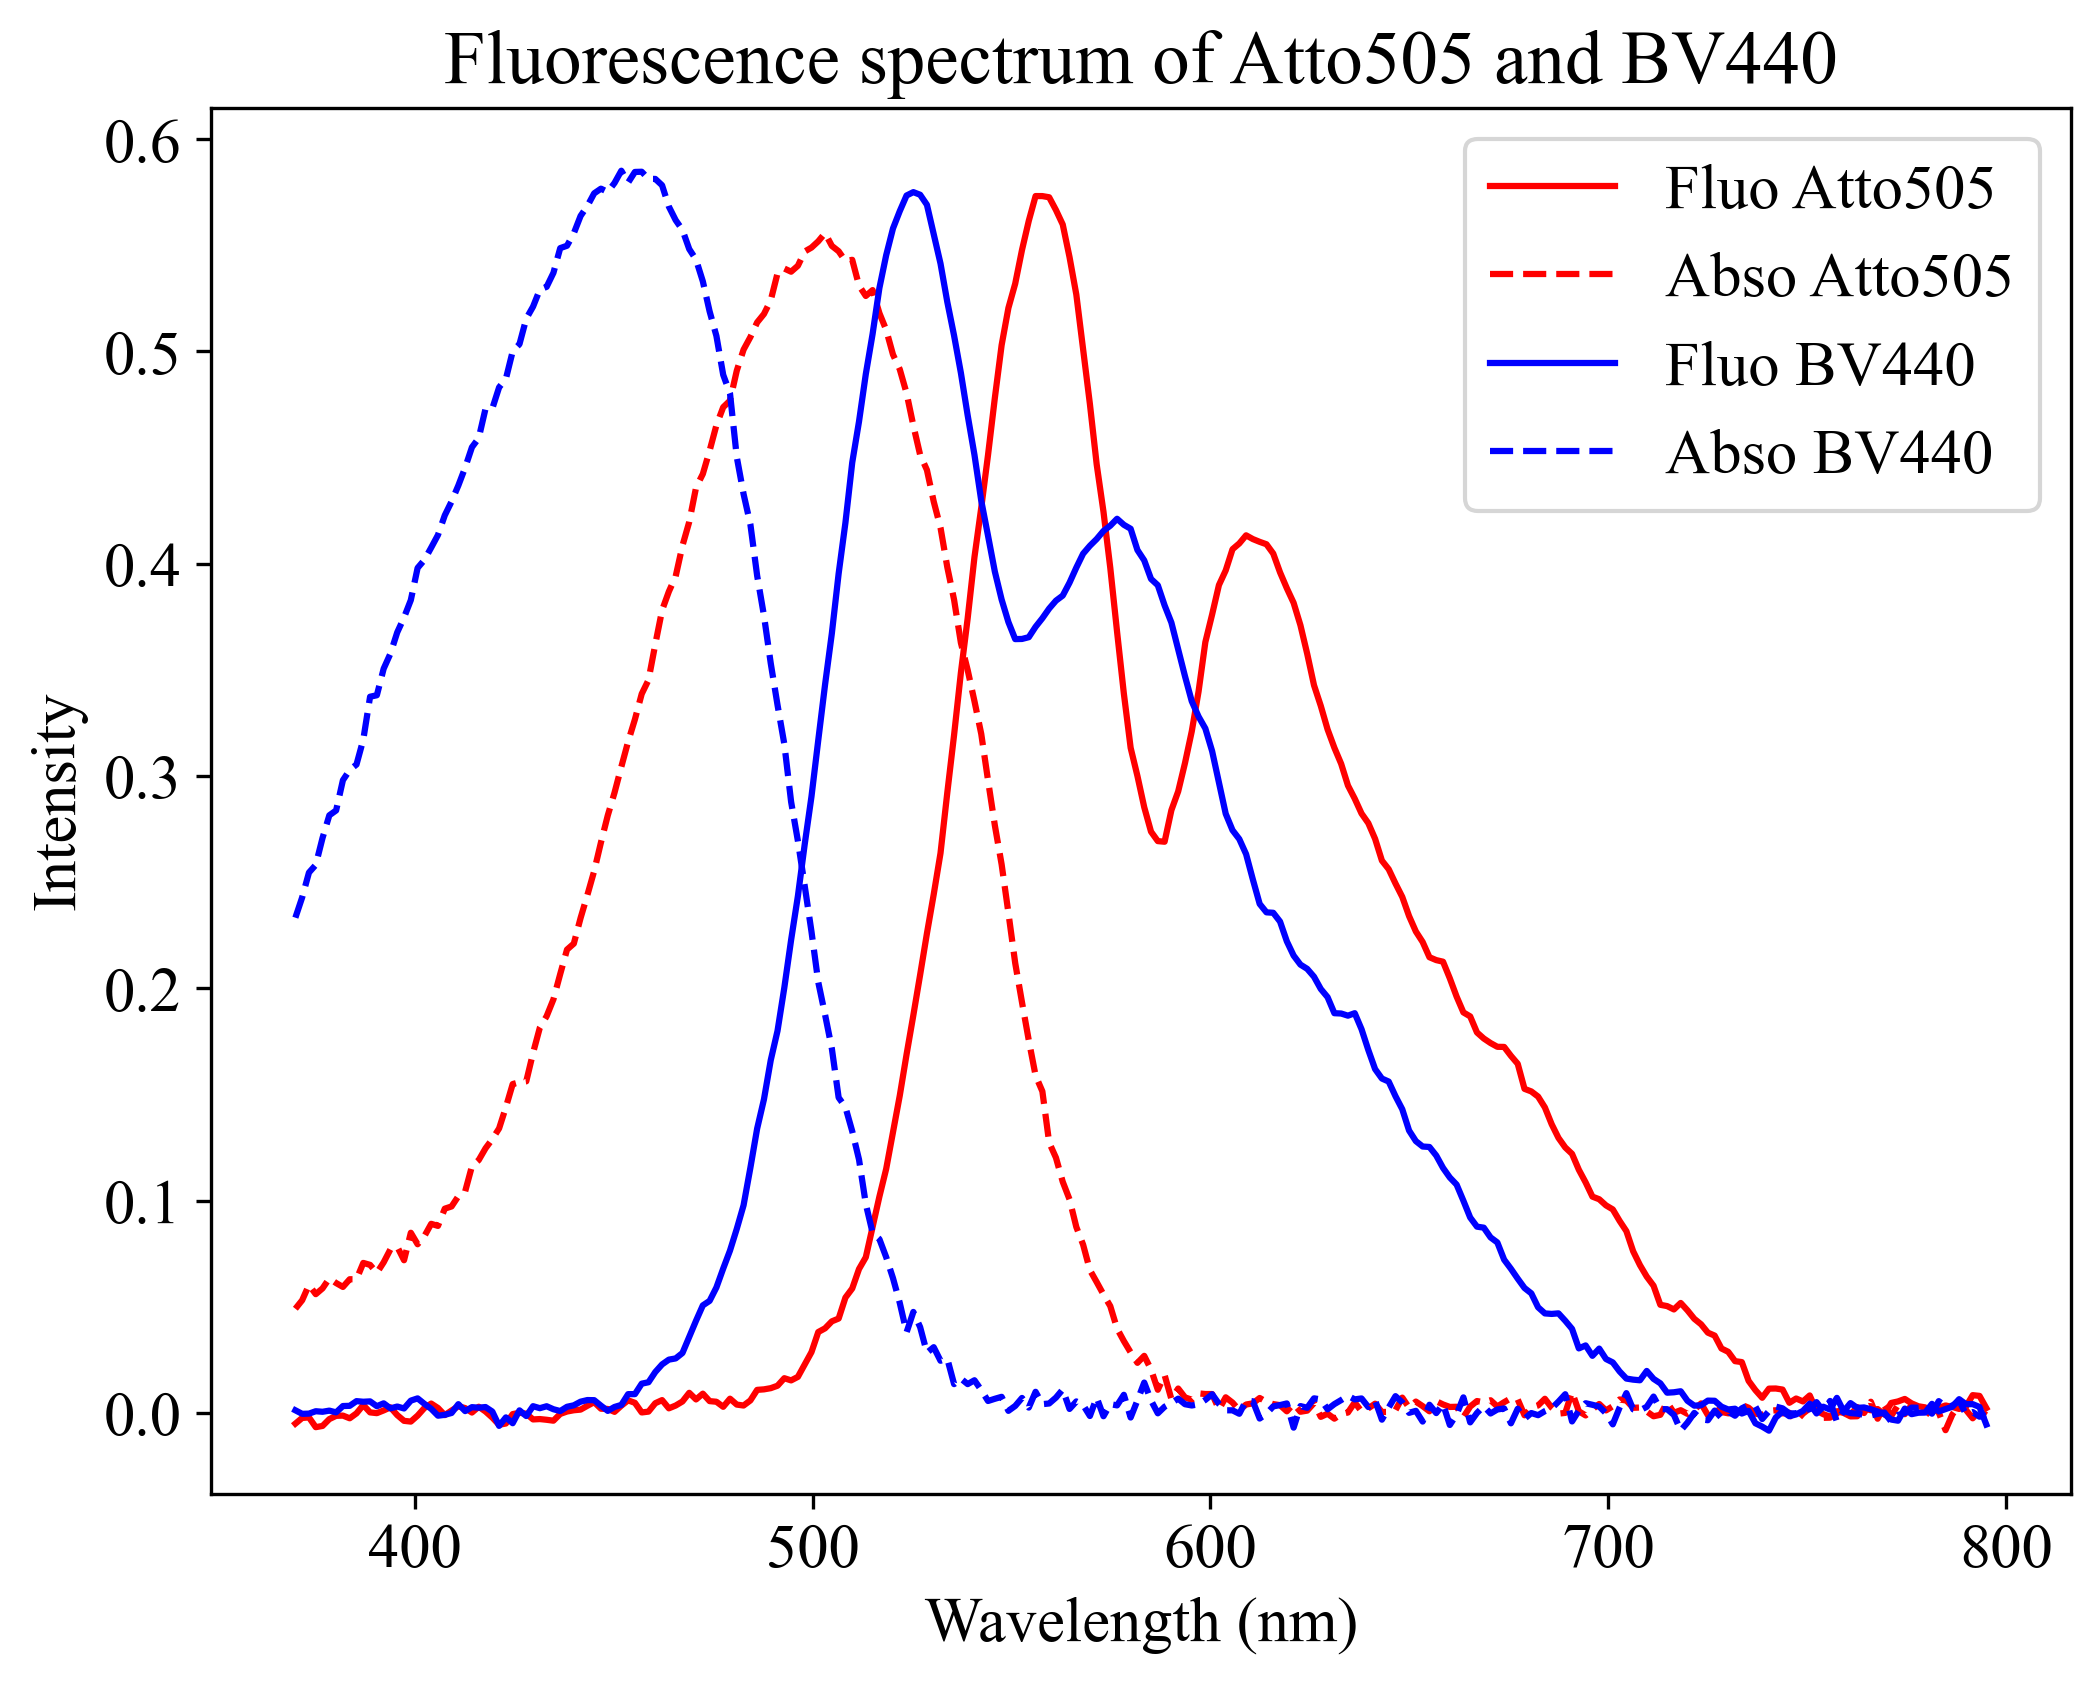

In [46]:

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})


plot(F_atto505_WL,F_atto505_OD,label='Fluo Atto505', color='red')
plot(A_atto505_WL,A_atto505_OD,label='Abso Atto505', linestyle='--', color='red')

plot(F_BV440_WL,F_BV440_OD,label='Fluo BV440', color='blue')

plot(A_BV440_WL,A_BV440_OD,label='Abso BV440', linestyle='--', color='blue')

# Add styles for the graph
plt.title('Fluorescence spectrum of Atto505 and BV440')

xlabel('Wavelength (nm)')
ylabel('Intensity')

#plt.xlim([1.5,3])
#plt.ylim()

#plt.grid(True, which='both')
#plt.axhline(y=0, color='k')
#plt.axvline(x=0, color='k')

plt.legend()
plt.show()

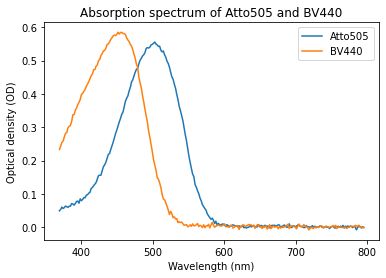

In [338]:
plot(A_atto505_WL,A_atto505_OD,label='Atto505')
plot(A_BV440_WL,A_BV440_OD,label='BV440')
title('Absorption spectrum of Atto505 and BV440')
xlabel('Wavelength (nm)')
ylabel('Optical density (OD)')
legend()

In [339]:
TAS_TA

array([[-2.50000000e+00, -1.11312262e-06,  5.13690796e-05, ...,
        -4.77357411e-05,  4.59269995e-06, -2.44699771e-05],
       [-2.49700000e+00, -1.52451999e-04,  3.44397961e-06, ...,
         6.26474943e-05,  1.71661555e-05, -2.98235675e-05],
       [-2.49400000e+00, -5.93155723e-05,  1.41512595e-05, ...,
         1.33076222e-05, -2.67466622e-06, -1.74044827e-05],
       ...,
       [ 1.99940000e+01,  7.47475089e-05,  7.01702663e-05, ...,
        -1.18495170e-04, -6.59810099e-05, -9.49227856e-05],
       [ 1.99970000e+01, -1.23075754e-05,  1.13012880e-04, ...,
        -7.07873627e-05,  3.64853147e-06, -1.34787104e-05],
       [ 2.00000000e+01, -5.38486918e-05,  2.96455957e-05, ...,
        -1.15960992e-04, -8.53044639e-05, -7.39779251e-05]])

In [340]:
TIME=TAS_TA[:,0]

In [341]:
TIME

array([-2.5  , -2.497, -2.494, ..., 19.994, 19.997, 20.   ])

In [342]:
TTT=TAS_TA.tolist()
i=0
while i<len(TTT):
    del(TTT[i][0])
    i=i+1

In [343]:
TTT

[[-1.11312261538683e-06,
  5.13690796034738e-05,
  -3.71937318069814e-05,
  3.52422541015164e-05,
  7.43075948356079e-05,
  2.63091321874903e-05,
  -2.35785746550756e-05,
  -1.01551860716537e-05,
  1.1479505355933e-06,
  7.41227824793028e-05,
  7.88657793310919e-06,
  6.21912147981928e-05,
  -1.73720351485421e-05,
  2.53272653060949e-05,
  -1.69053268285543e-05,
  1.13539753431134e-07,
  -3.74456496448069e-05,
  -4.71990981330339e-05,
  3.39141975813041e-05,
  -1.73987962033742e-05,
  2.29011209984765e-05,
  -3.0129007534561e-05,
  -2.22568244882269e-05,
  2.01904146476216e-05,
  -6.96909209954397e-05,
  5.60072087434267e-05,
  1.39428389838698e-05,
  3.00893909963409e-05,
  1.53299674903569e-05,
  8.00603232293809e-05,
  3.11876904503681e-05,
  7.31269772414289e-05,
  -3.60351455500554e-05,
  3.2545472981008e-05,
  -6.65633438485583e-05,
  -2.65509318543814e-05,
  2.08958576147165e-05,
  4.81009662888854e-05,
  -2.22867972777065e-05,
  -7.06602687236572e-05,
  1.56307951116567e-05,
  

In [344]:
RRR=svd(TTT)

In [107]:
UU=RRR[2]
SS=RRR[1]
VV=RRR[0]

In [87]:
len(UU)

101

In [91]:
len(TAS_WL[1:102])

101

In [92]:
TAS_WLL=TAS_WL[1:102]

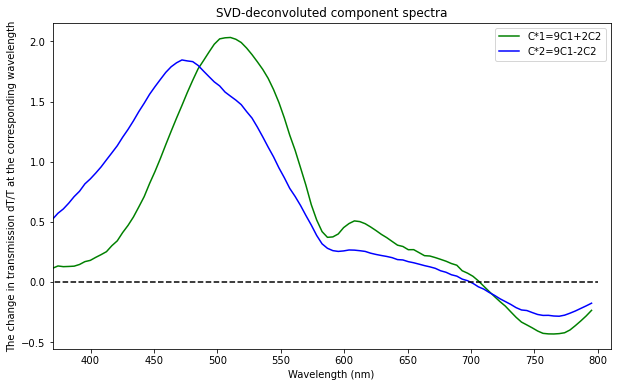

In [240]:
figsize(10,6)
UUTT1=9*UU[0]+2*UU[1]
UUTT2=9*UU[0]-2*UU[1]
UUTT3=UU[1]+UU[2]
UUTT4=UU[1]-UU[2]
X=[0,800]
Y=[0,0]
plot(TAS_WLL,UUTT1,linestyle='-',color='green',label='C*1=9C1+2C2')
plot(TAS_WLL,UUTT2,linestyle='-',marker='',label='C*2=9C1-2C2',color='blue')
plot(X,Y,linestyle='dashed',color='black')

xlabel('Wavelength (nm)')
ylabel('The change in transmission dT/T at the corresponding wavelength')
title('SVD-deconvoluted component spectra')
xlim(370,810)

legend()

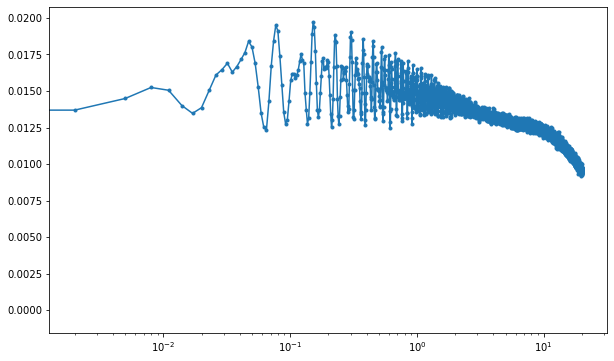

In [168]:
plot(TIME,VV[:,0],linestyle='-',marker='.',label='el2')

xscale('log')

In [145]:
plot(TIME,VV[0],linestyle='-',marker='.',label='el2')
xscale('log')

array([[ 5.46702572e-05, -9.24030936e-04, -2.88638590e-03, ...,
         8.60487540e-03, -3.07072653e-03, -3.56013244e-03],
       [-2.76199698e-04, -4.19953165e-04, -1.35871772e-02, ...,
         3.39664360e-03, -2.87350159e-02, -1.72272161e-02],
       [ 1.49404344e-05,  5.56222044e-04, -3.38837060e-03, ...,
         1.48816686e-02, -2.58781960e-03, -2.98319917e-02],
       ...,
       [ 9.38245343e-03,  6.33129187e-03,  7.07097515e-03, ...,
         9.89522321e-01,  4.48174668e-04,  1.74052436e-03],
       [ 9.79902653e-03,  7.05680131e-03,  5.05347059e-03, ...,
         5.22968850e-04,  9.87347800e-01, -1.87785667e-03],
       [ 9.97085616e-03,  6.88854620e-03, -6.75432363e-03, ...,
         1.53637289e-03, -1.66947099e-03,  9.86329268e-01]])

In [119]:
len(VV[0])

7501

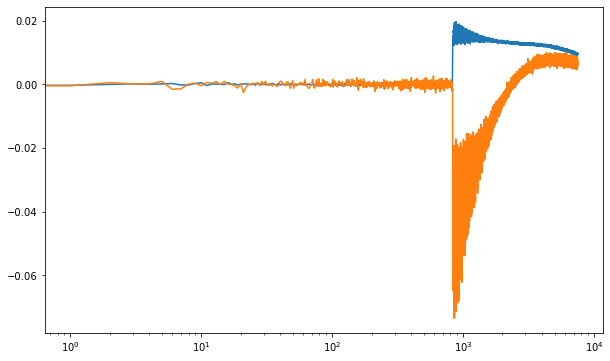

In [169]:
plot(VV[:,0])
plot(VV[:,1])

xscale('log')

In [191]:
VVV1=9*VV[:,0]+2*VV[:,1]
VVV2=9*VV[:,0]-2*VV[:,1]

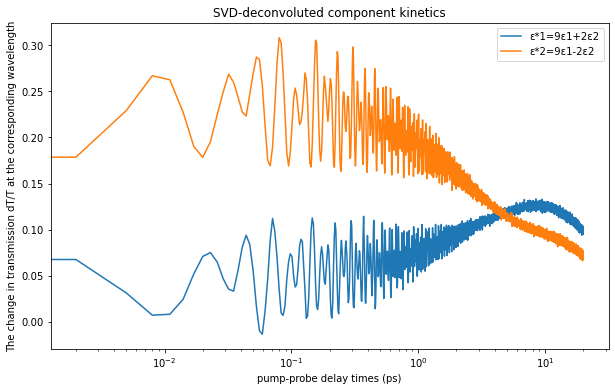

In [360]:
plot(TIME,VVV1,label='ε*1=9ε1+2ε2')
plot(TIME,VVV2,label='ε*2=9ε1-2ε2')
title('SVD-deconvoluted component kinetics')
xlabel('pump-probe delay times (ps)')
ylabel('The change in transmission dT/T at the corresponding wavelength')
xscale('log')
legend()

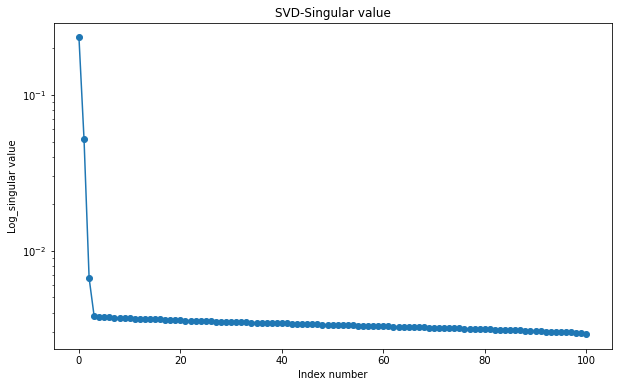

In [243]:
plot(SS,marker='o')
title('SVD-Singular value')
xlabel('Index number')
ylabel('Log_singular value')

yscale('log')

In [201]:
TAS_WLL=TAS_WL[1:102]

In [215]:
TIME[5000]

12.5

In [205]:
len(TAS_WLL)

101

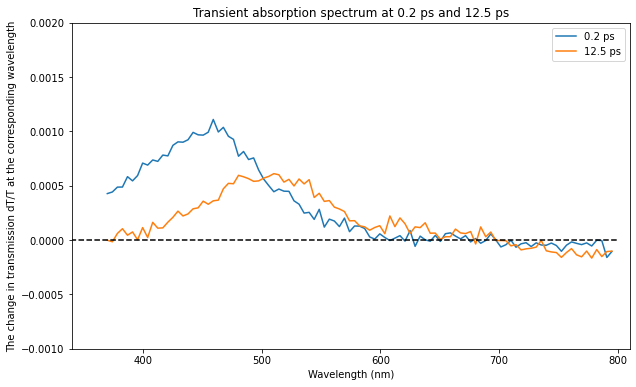

In [217]:
figsize(10,6)
Ttrial1=TTT[5000]
Ttrial2=TTT[900]
plot(TAS_WLL,Ttrial2,label='0.2 ps')
plot(TAS_WLL,Ttrial1,label='12.5 ps')
plot(X,Y,linestyle='dashed',color='black')
title('Transient absorption spectrum at 0.2 ps and 12.5 ps')
xlabel('Wavelength (nm)')
ylabel('The change in transmission dT/T at the corresponding wavelength')
xlim(340,810)
ylim(-0.0010,0.002)
legend()

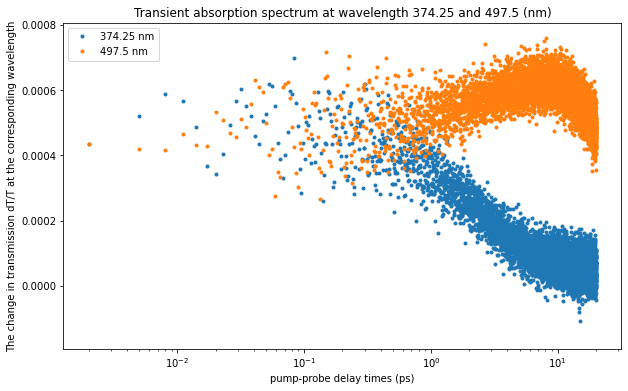

In [233]:
TW31=array(TTT)[:,3]
TW11=array(TTT)[:,32]
plot(TIME,TW31,label='374.25 nm',marker='.',linestyle='')
plot(TIME,TW11,label='497.5 nm',marker='.',linestyle='')
title('Transient absorption spectrum at wavelength 374.25 and 497.5 (nm)')
xlabel('pump-probe delay times (ps)')
ylabel('The change in transmission dT/T at the corresponding wavelength')
xscale('log')
legend()

In [230]:
TAS_WL[2]

374.25

In [271]:
import numpy as np
import matplotlib.pyplot as plt

In [272]:
data = TAS_TA
time = data[:, 0]
absorbance1 = VVV1
absorbance_filtered1 = absorbance1
absorbance2 = VVV2
absorbance_filtered2 = absorbance2

In [319]:
spectrum1 = np.fft.fft(absorbance_filtered1)
spectrum2 = np.fft.fft(absorbance_filtered2)

In [351]:
freq = np.fft.fftfreq(len(time), d=time[1]-time[0])

TypeError: object of type 'module' has no len()

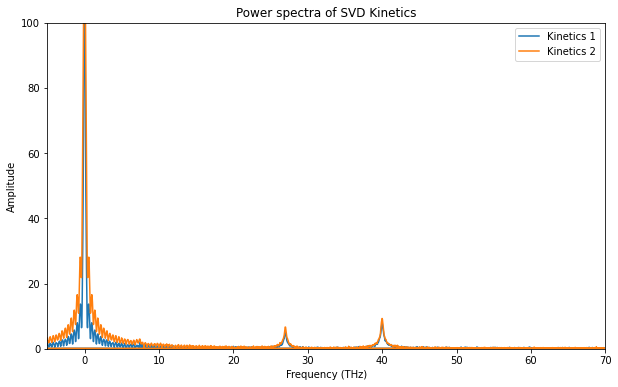

In [353]:
figsize(10,6)
plt.plot(freq, np.abs(spectrum1),label='Kinetics 1')
plt.plot(freq, np.abs(spectrum2),label='Kinetics 2')
plt.xlabel('Frequency (THz)')
plt.ylabel('Amplitude')
title('Power spectra of SVD Kinetics')
xlim(-5,70)
ylim(0,100)
legend()
plt.show()

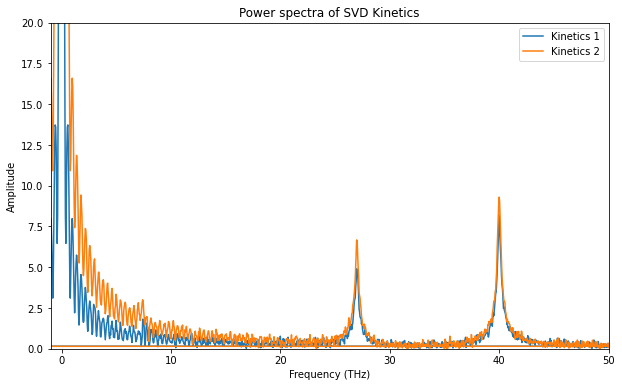

In [356]:
figsize(10,6)
plt.plot(freq, np.abs(spectrum1),label='Kinetics 1')
plt.plot(freq, np.abs(spectrum2),label='Kinetics 2')
plt.xlabel('Frequency (THz)')
plt.ylabel('Amplitude')
title('Power spectra of SVD Kinetics')

xlim(-1,50)
ylim(0,20)
legend()
plt.show()